<a href="https://colab.research.google.com/github/andrewng88/ml_from_scratch/blob/master/2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

class LinearRegression:

    def __init__(self, learning_rate=1e-3, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # X from input
            # need to use self.variables at the same function
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
 
    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

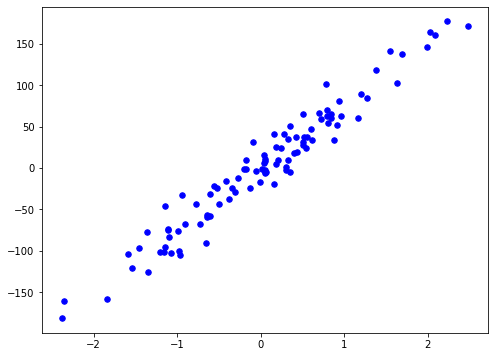

MSE: 305.7719958301902


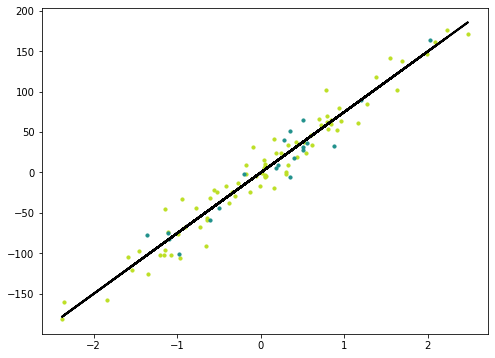

In [8]:
# import LinearRegression
# from regression import LinearRegression

def mean_squared_error(y_true, y_pred):
  '''Calculate MSE'''
  return np.mean((y_true - y_pred)**2)

# create dataset for linear regression
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Inspect/Show generated data
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30) 
plt.show()

# from the LinearRegression Class above
regressor = LinearRegression(learning_rate=0.01, n_iters=1000)

# train the dataset
regressor.fit(X_train, y_train)

# predict the dataset
predictions = regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

# predicition
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))

# plot train, test and regression line
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.show();